In [10]:
#!pip install tensorflow==2.0.0-alpha0

In [11]:
import numpy as np
import tensorflow as tf

In [12]:
print("Tensorflow: ", tf.__version__)

Tensorflow:  2.0.0-alpha0


In [13]:
a = tf.Variable(10.0)
print(a.numpy())

10.0


In [14]:
def forward(x):
  return a*x

print(forward(7))

tf.Tensor(70.0, shape=(), dtype=float32)


In [15]:
loss = lambda: abs(forward(7)-35)
print(loss)

<function <lambda> at 0xb2c557620>


In [16]:
optimizer = tf.optimizers.Adam(learning_rate=0.1)
for _ in range(50):
  optimizer.minimize(loss, var_list=[a])
  print(a.numpy(), forward(7))


9.9 tf.Tensor(69.299995, shape=(), dtype=float32)
9.8 tf.Tensor(68.6, shape=(), dtype=float32)
9.7 tf.Tensor(67.9, shape=(), dtype=float32)
9.6 tf.Tensor(67.200005, shape=(), dtype=float32)
9.500001 tf.Tensor(66.50001, shape=(), dtype=float32)
9.400001 tf.Tensor(65.8, shape=(), dtype=float32)
9.300001 tf.Tensor(65.100006, shape=(), dtype=float32)
9.200001 tf.Tensor(64.40001, shape=(), dtype=float32)
9.100001 tf.Tensor(63.70001, shape=(), dtype=float32)
9.000001 tf.Tensor(63.000008, shape=(), dtype=float32)
8.900001 tf.Tensor(62.300003, shape=(), dtype=float32)
8.800001 tf.Tensor(61.600006, shape=(), dtype=float32)
8.700001 tf.Tensor(60.900005, shape=(), dtype=float32)
8.6 tf.Tensor(60.200005, shape=(), dtype=float32)
8.5 tf.Tensor(59.5, shape=(), dtype=float32)
8.4 tf.Tensor(58.799995, shape=(), dtype=float32)
8.299999 tf.Tensor(58.099995, shape=(), dtype=float32)
8.199999 tf.Tensor(57.399994, shape=(), dtype=float32)
8.099998 tf.Tensor(56.69999, shape=(), dtype=float32)
7.9999986 tf.T

In [17]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3


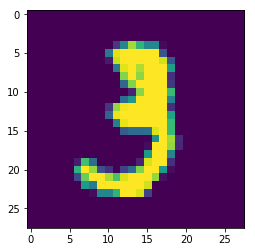

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[10])
print(y_train[10])

In [19]:
x_train = x_train / 255.0
x_test = x_test/ 255.0

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = 50, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2793 - accuracy: 0.9204
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1235 - accuracy: 0.9647
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0867 - accuracy: 0.9740
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0652 - accuracy: 0.9808
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0522 - accuracy: 0.9843


In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0757 - accuracy: 0.9737


[0.07566931752618403, 0.9737]

In [22]:
np.argmax(model(x_train)[10])

3

In [23]:
inputs = tf.keras.Input(shape=(28,28))
network = tf.keras.layers.Flatten()(inputs)
network = tf.keras.layers.Dense(512, activation=tf.nn.relu)(network)
network = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(network)

functionalmodel = tf.keras.Model(inputs=inputs, outputs=network)

functionalmodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
functionalmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
functionalmodel.fit(x_train, y_train, batch_size=50, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2152 - accuracy: 0.9381
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0859 - accuracy: 0.9746
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0553 - accuracy: 0.9829
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0393 - accuracy: 0.9876
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0274 - accuracy: 0.9913


In [25]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.flat = tf.keras.layers.Flatten(input_shape=(28,28))
    self.dense1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy()
    
    self.optimizer = tf.optimizers.Adam()
    
    
    self.accuracy = tf.keras.metrics.Accuracy()
    
  def call(self, inputs):
    flat = self.flat(inputs)
    dense1 = self.dense1(flat)
    return self.dense2(dense1)
  
  def get_loss(self, inputs, expected):
    return self.loss(expected, self(inputs))
  
  def optimize(self, inputs, expected):
    loss = lambda: self.get_loss(inputs, expected)
    self.optimizer.minimize(loss=loss, var_list=self.trainable_weights)
    
  def get_accuracy(self, inputs, expected):
    return self.accuracy(expected, tf.argmax(self(inputs),axis=1))
  
  
  def fit(self, x, y, batch_size, epochs):
    num_samples = x.shape[0]
    for epoch in range(epochs):
      for start in range(0, num_samples, batch_size):
        x_batch = x[start:start+batch_size]
        y_batch = y[start:start+batch_size]
        self.optimize(x_batch, y_batch)
      loss = self.get_loss(x,y)
      acc = self.get_accuracy(x,y)
      print("epoch: {}, loss: {}, accuracy: {}".format(epoch, loss, acc))
        

In [26]:
class_model = MyModel()
class_model.fit(x_train, y_train, batch_size = 50, epochs =5)

epoch: 0, loss: 0.16513076424598694, accuracy: 0.9508833289146423
epoch: 1, loss: 0.11489909142255783, accuracy: 0.9576666951179504
epoch: 2, loss: 0.09307039529085159, accuracy: 0.961650013923645
epoch: 3, loss: 0.07997414469718933, accuracy: 0.9644874930381775
epoch: 4, loss: 0.06689359992742538, accuracy: 0.9669566750526428


In [27]:
np.argmax(class_model(x_train)[10])

3